In [1]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import smooth

# q5 curves

vanilla ICM (5, 1000)
vanilla Disagreement (5, 1000)
vanilla E3B (5, 1000)
vanilla RND (5, 1000)
vanilla PseudoCounts (5, 1000)
vanilla RIDE (5, 1000)
vanilla RE3 (5, 1000)
vanilla NGU (5, 1000)
lstm ICM (5, 1000)
lstm Disagreement (4, 1000)
lstm E3B (4, 1000)
lstm RND (5, 1000)
lstm PseudoCounts (5, 1000)
lstm RIDE (5, 1000)
lstm RE3 (5, 1000)
lstm NGU (5, 1000)


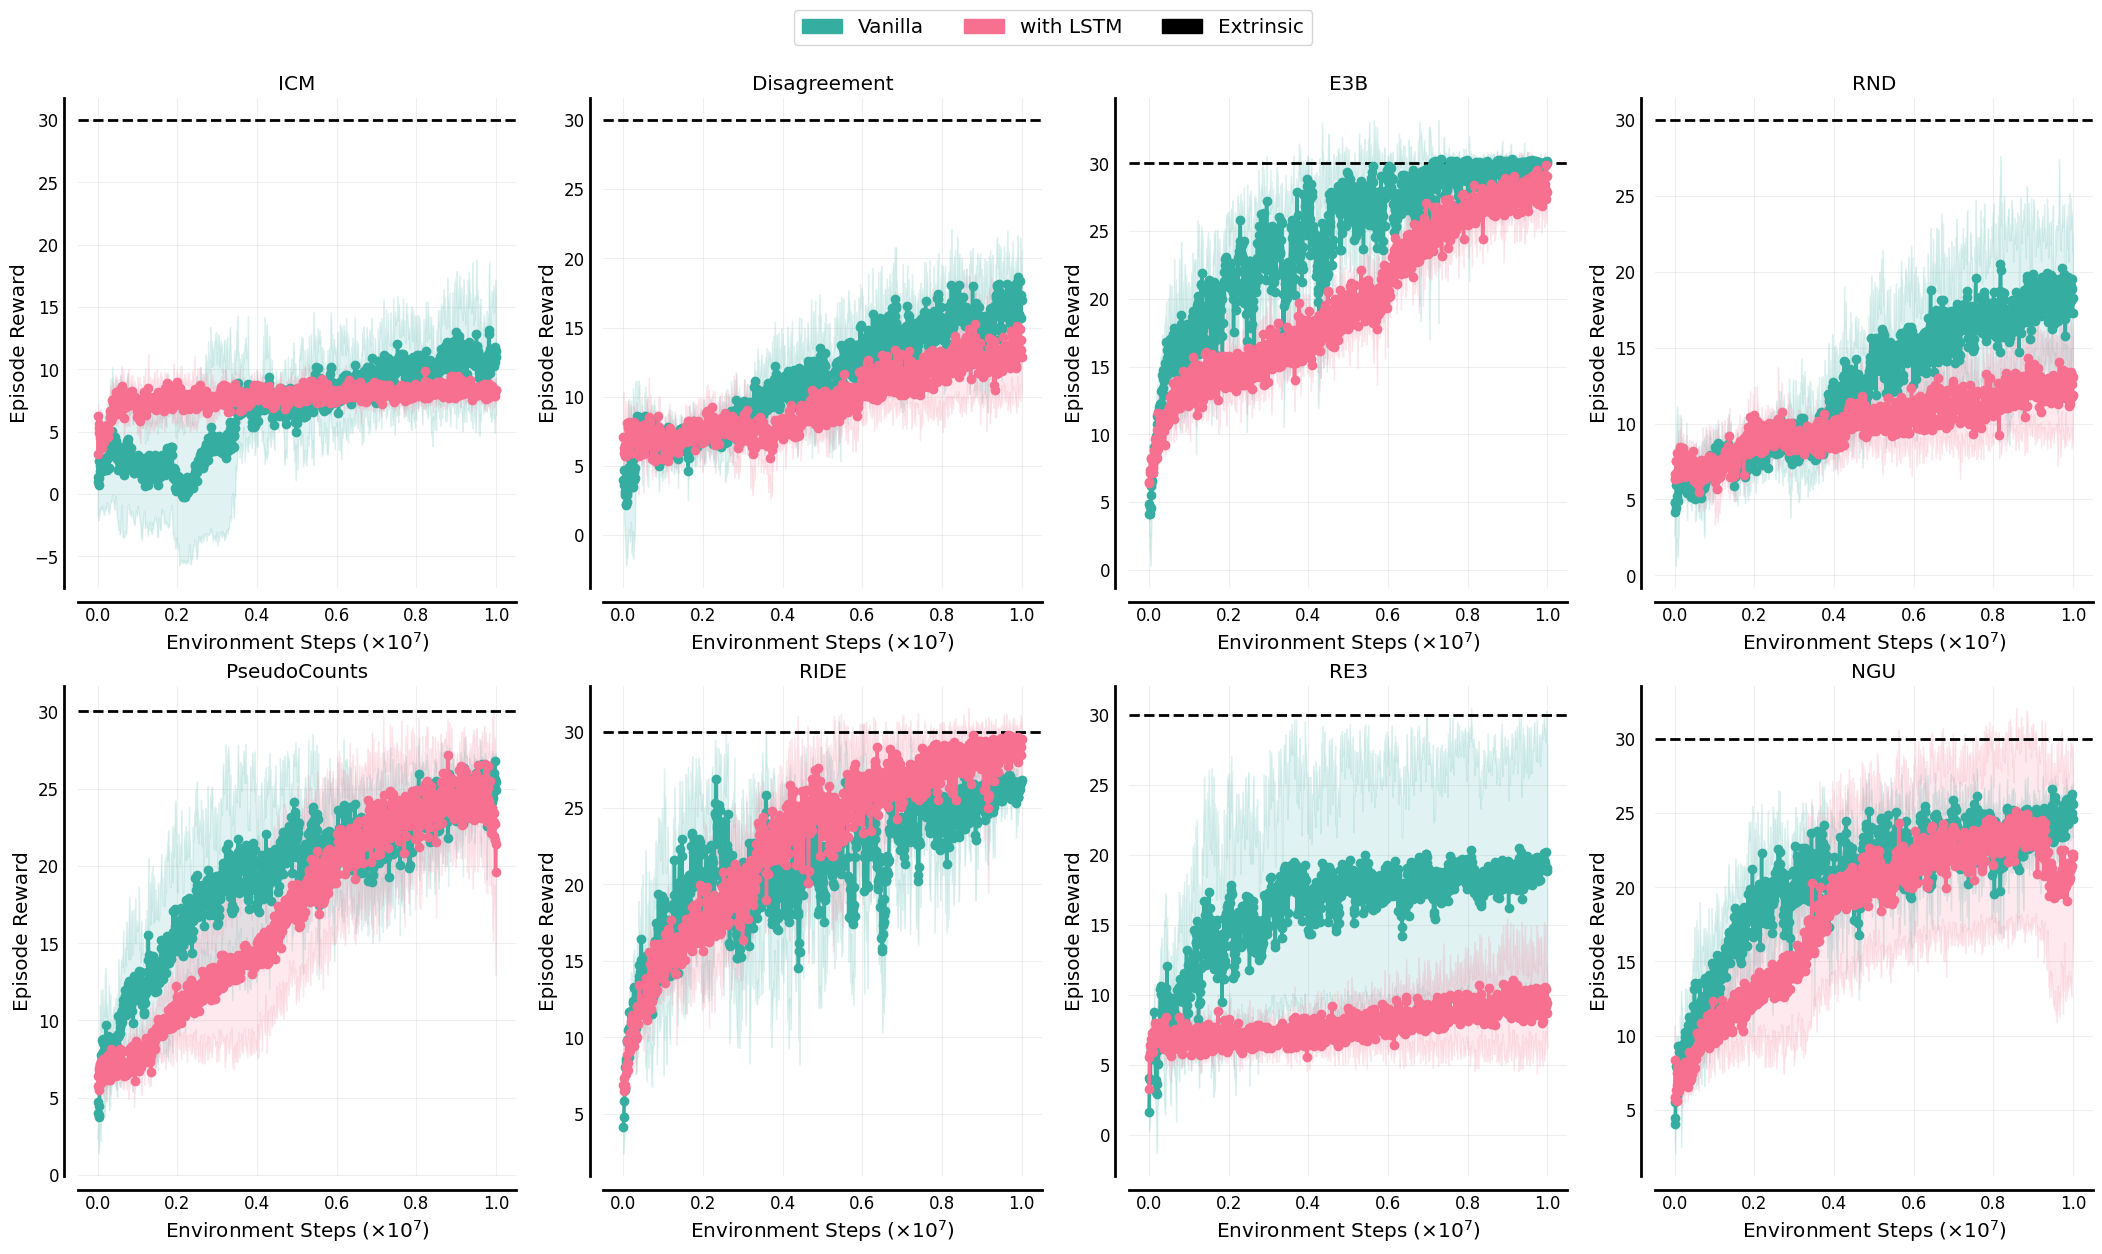

In [3]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['vanilla', 'lstm']
legends = ['Vanilla', 'with LSTM', 'Extrinsic']
colors = sns.husl_palette(len(candidates), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(candidates)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

fig, axes = plt.subplots(2, 4, figsize=(26, 14))

for subplot_idx, candidate in enumerate(candidates):
    root = f"./data/q5_new/{candidate}/"
    num_points = 1000
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                # data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1.0, num_points)
        if subplot_idx == 0:
            ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
        
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        # ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq4_curves.pdf', bbox_inches='tight', dpi=300)

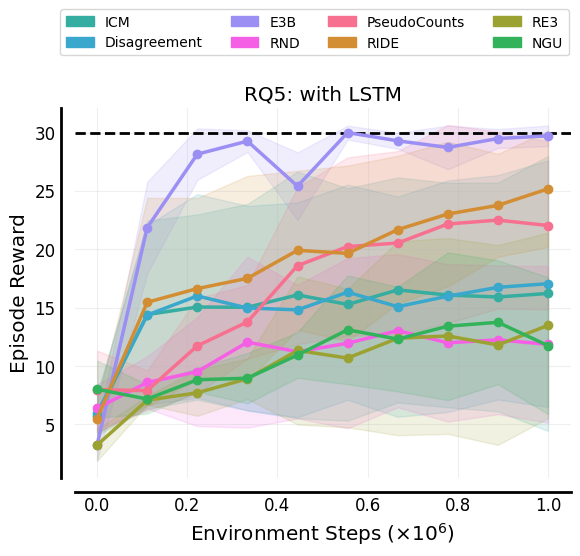

In [4]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
colors = sns.husl_palette(len(algos), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

root = "./data/q5"
num_points = 10
all_data = {algo: [] for algo in algos}
for algo in algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']
            data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
            data = smooth(data, 0.95)
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])

fig, ax = plt.subplots()

x = np.linspace(0, 1, num_points)
ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
for algo, color in zip(algos, colors):
    mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
    ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=color, label=algo)
    ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=color)

ax.set_title('RQ5: with LSTM', fontsize="x-large")
ax = _annotate_and_decorate_axis(ax, 
                                 ticklabelsize="large",
                                 xlabel=r"Environment Steps ($\times 10^6$)", 
                                 ylabel="Episode Reward",
                                 xticklabels=np.linspace(0, 1, num_points),
                                 )

fig.legend(fake_patches, algos, loc='upper center', 
    fancybox=True, ncol=4,
    # fontsize='x-large',
    bbox_to_anchor=(0.5, 1.1))
fig.savefig('figure_rq5_curves.pdf', bbox_inches='tight', dpi=300)